In [82]:
# Import Kaggle to download the newest version of dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [57]:
# Importing OS for attaching the working files instead of temporary files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [58]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
# Upload the dataset file and check the first five rows of the data to understand the dataset
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
# display a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [61]:
# Check the shape of the creditcard dataset
data.shape

(284807, 31)

In [62]:
# check for missing (null) values in the dataset
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [63]:
# Check if there are any duplicated values, if yes, remove them
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


In [64]:
# Check the summary of the statistical properties of the numerical columns in the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [65]:
# Check the distribution of the target variable 'Class'
class_distribution = data['Class'].value_counts()
class_distribution

,count
Class,
0,284315
1,492


In [66]:
# Classify the values as : 0 = "legit" and 1 = "fraud"
legit = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]

In [84]:
# print the shape of the subsets
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


The below code is a common technique used to balance the dataset by undersampling the majority class (non-fraudulent transactions) to match the number of instances in the minority class (fraudulent transactions).

In [68]:
# Sampling a subset of data
legit_sample = legit.sample(n=492)
print(legit_sample)

            Time        V1        V2        V3        V4        V5        V6  \
261415  160006.0  1.893898 -0.835225  0.556513  0.782580 -1.301645  0.363022   
114835   73637.0  1.102213 -0.149411  0.157866  1.091289  0.187181  1.013255   
24372    33202.0 -0.465207  1.175757  0.735338  0.422040  0.890487 -0.098977   
31069    36196.0  1.317039 -0.917213  0.970318 -0.708785 -1.463094  0.006318   
179062  123905.0  1.915138 -1.889232 -1.171105 -1.489490 -1.183580 -0.516039   
...          ...       ...       ...       ...       ...       ...       ...   
181337  124928.0 -2.533518  0.850687  1.750756  0.538407 -2.080732  1.665043   
223775  143516.0  0.256585  0.780460 -0.162337  0.473613  1.446688 -0.428104   
109003   71171.0 -0.426415  0.512428  1.597602 -0.495998 -0.052617 -0.313441   
160717  113577.0 -0.406916  0.495423 -0.222752 -0.790593  0.824570 -1.255726   
87819    61859.0 -0.303995  0.230765  0.522266  0.002648  2.139949  4.427621   

              V7        V8        V9  .

The purpose of the below code is to prepare a balanced dataset for training a machine learning model to predict fraud, where the class distribution is equal, addressing the class imbalance problem.

In [69]:
# combine two datasets into a single DataFrame
data = pd.concat([legit_sample,fraud], axis=0)

In [70]:
data.shape

(984, 31)

In [71]:
# Compute the mean of each numerical column in the data DataFrame, grouped by the "Class" column.
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99385.991870,0.106193,-0.074286,-0.037723,-0.078289,0.019706,0.033732,-0.035138,0.047947,-0.083168,...,-0.045975,-0.002386,0.012709,-0.015225,-0.035953,0.011300,-0.024062,-0.026850,-0.008095,78.479980
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [72]:
# Separate the features (inputs) and the target variable (output) in the dataset
x = data.drop("Class", axis=1)
y = data["Class"]

In [75]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [76]:
# Model Training
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
# Model Evaluation
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9466327827191868
Accuracy score on Test Data :  0.9390862944162437


In [78]:
# Predict probabilities for the positive class
y_prob = model.predict_proba(x_test)[:, 1]

In [79]:
# Calculate precision-recall curve
from sklearn.metrics import accuracy_score, precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

In [80]:
# Calculate AUPRC
auprc = auc(recall, precision)
print(f"AUPRC: {auprc}")

AUPRC: 0.9845775000724002


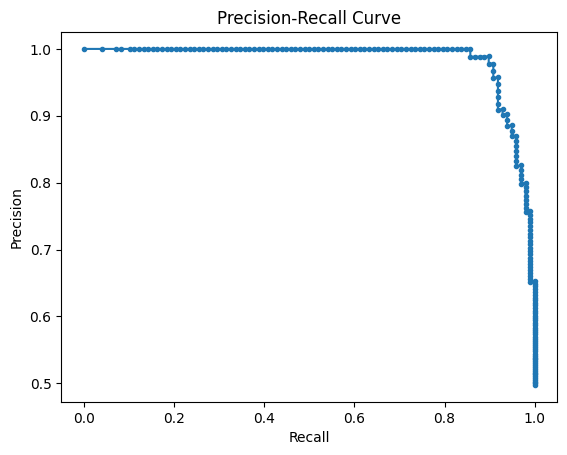

In [81]:
# Plot the precision-recall curve
import matplotlib.pyplot as plt
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()